In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv('34658-0001-Data.tsv', sep='\t')
df.head()

,CASEID,CLASSID,SCHOOLID,CITYID,SRVDAT1_M,SRVDAT1_Y,SRVDAT1_D,SRVDAT2_M,SRVDAT2_Y,SRVDAT2_D,...,AWEIGHT,PWEIGHT,LMCITY,STOWN,FWALL,FWLMCITY,FWSTOWN,FWTOT,FWTOTLM,FWTOTST
0,101001,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
1,101002,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
2,101003,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
3,101004,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269
4,101005,10101,10101,1000003,10,2006,-8,10,2006,-8,...,1.0,1.0,0,1,0.825625,0.0,0.7921,0.951486,0.0,0.884269


In [89]:
# add a column indicating crime
# activities 52 - 58: alcohol consumption, drug use, theft, violence, drug selling

cond1 = df['BEERLTP'] == 1 # drank alcohol before?
cond2 = df['HASHLTP'] == 1 # marijuana
cond3 = df['LHCLTP']  == 1 # LSD, heroine, cocaine
cond4 = df['SHOPLTP'] == 1# shoplifting
cond5 = df['BICTLTP'] == 1# stealing bike, etc.
cond6 = df['CARBLTP'] == 1 # stealing from a car
cond7 = df['SNATLTP'] == 1 # setaling a bag
cond8 = df['WEAPLTP'] == 1 # carrying a weapon
cond9 = df['GFIGLTP'] == 1 # fighting in a public place
cond10= df['ASLTLTP'] == 1 # violent behavior towards someone
cond11= df['DRUDLTP'] == 1 # drug selling

df['committed_crime']=np.where(cond1 | cond2 | cond3 | cond4 | cond5 | cond6 | cond7 | cond8 | cond9 | cond10 | cond11, 1,0)

In [90]:
df['committed_crime']

0        1
1        1
2        0
3        0
4        0
        ..
68502    0
68503    0
68504    1
68505    1
68506    1
Name: committed_crime, Length: 68507, dtype: int32

In [92]:
df['ACTIV01'].value_counts(dropna=False)

df_crime = df.where(df['committed_crime']==1)
df_ncrime = df.where(df['committed_crime']==0)

# select only not NAN columns
df_crime=df_crime[-df_crime['CASEID'].isnull()]
df_ncrime=df_ncrime[-df_ncrime['CASEID'].isnull()]

df_crime.head()

,CASEID,CLASSID,SCHOOLID,CITYID,SRVDAT1_M,SRVDAT1_Y,SRVDAT1_D,SRVDAT2_M,SRVDAT2_Y,SRVDAT2_D,...,PWEIGHT,LMCITY,STOWN,FWALL,FWLMCITY,FWSTOWN,FWTOT,FWTOTLM,FWTOTST,committed_crime
0,101001.0,10101.0,10101.0,1000003.0,10.0,2006.0,-8.0,10.0,2006.0,-8.0,...,1.0,0.0,1.0,0.825625,0.0,0.7921,0.951486,0.0,0.884269,1.0
1,101002.0,10101.0,10101.0,1000003.0,10.0,2006.0,-8.0,10.0,2006.0,-8.0,...,1.0,0.0,1.0,0.825625,0.0,0.7921,0.951486,0.0,0.884269,1.0
7,101009.0,10102.0,10101.0,1000003.0,10.0,2006.0,-8.0,10.0,2006.0,-8.0,...,1.0,0.0,1.0,0.825625,0.0,0.7921,0.951486,0.0,0.884269,1.0
11,101013.0,10102.0,10101.0,1000003.0,10.0,2006.0,-8.0,10.0,2006.0,-8.0,...,1.0,0.0,1.0,0.825625,0.0,0.7921,0.951486,0.0,0.884269,1.0
12,101014.0,10102.0,10101.0,1000003.0,10.0,2006.0,-8.0,10.0,2006.0,-8.0,...,1.0,0.0,1.0,0.825625,0.0,0.7921,0.951486,0.0,0.884269,1.0


activ01
activ07
24.1 doing homework
24.2 reading a book
24.3 watching TV, playing games, chatting on the computer
24.4 reading magazines or comic books
24.5 hanging out with friends
24.6 playing sports
24.7 playing a music instrument
1 - none
2 - 1/2 hour
3 - one hour
4 - two hours
5 - three hours
6 - four hours

27 - friends? 0 - no, 1 - yes
if yes, then 28-34
frndac01-09
We usually.... Never Sometimes Often Always
37.1 go to discos or popconcerts
37.2 play in a band
37.3 drink a lot of beer/alcohol or take drugs
37.4 smash or vandalize things just for fun
37.5 shoplift just for fun
37.6 play sports
37.7 play computer games or chat on the computer
37.8 frighten and annoy people around us just for fun
37.9 Other, namely
1: never
2: sometimes
3: often
4: always
7: ambiguous answer
9: no answer
frndacs [37.9s]
(text32)

In [93]:
def get_just_qactive(df):
    # restrict to ACTIVXX columns
    q_activ_1 = df['ACTIV01'].value_counts(dropna=False,normalize=True)
    q_activ_2 = df['ACTIV02'].value_counts(dropna=False,normalize=True)
    q_activ_3 = df['ACTIV03'].value_counts(dropna=False,normalize=True)
    q_activ_4 = df['ACTIV04'].value_counts(dropna=False,normalize=True)
    q_activ_5 = df['ACTIV05'].value_counts(dropna=False,normalize=True)
    q_activ_6 = df['ACTIV06'].value_counts(dropna=False,normalize=True)
    q_activ_7 = df['ACTIV07'].value_counts(dropna=False,normalize=True)

    df2 = pd.DataFrame({'ACTIV01': q_activ_1,
                   'ACTIV02': q_activ_2,
                   'ACTIV03': q_activ_3,
                   'ACTIV04': q_activ_4,
                   'ACTIV05': q_activ_5,
                   'ACTIV06': q_activ_6,
                   'ACTIV07': q_activ_7,
                  })
    
    # rename columns first
    # question labels
    questions={'ACTIV01':'doing homework',
               'ACTIV02':'reading a book',
               'ACTIV03':'watching TV/playing games/chatting on the computer',
               'ACTIV04':'reading magazines or comic books',
               'ACTIV05':'hanging out with friends',
               'ACTIV06':'playing sports',
               'ACTIV07':'playing a music instrument'}
    df2.rename(columns=questions,inplace =True)

    # transpose the array so the bar chart will group by question
    df3 = df2.T
    return df3

In [94]:
df_crime2 = get_just_qactive(df_crime)
df_ncrime2 = get_just_qactive(df_ncrime)

In [95]:
df_crime2.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0
doing homework,0.084775,0.308790,0.334938,0.165192,0.058020,0.031005,0.008824,0.008456
reading a book,0.413620,0.290187,0.163111,0.060470,0.022289,0.023676,0.008521,0.018126
watching TV/playing games/chatting on the computer,0.021963,0.068687,0.183752,0.256645,0.190647,0.255301,0.008022,0.014982
reading magazines or comic books,0.396188,0.382117,0.132301,0.035103,0.013334,0.013963,0.008282,0.018711
hanging out with friends,0.074541,0.066411,0.129830,0.177811,0.170504,0.353541,0.009150,0.018213


In [96]:
# answer labels
index = ['none', 
        '1/2 hour', 
        'one hour',
        'two hours',
        'three hours',
        'four hours',
        'ambiguous answer',
        'no answer']

# custom color mapping
colors = {1:'#E3E6F2',
         2:'#9DA8D2',
         3:'#7382BF',
         4:'#5766B2',
         5:'#404D8C',
         6:'#2D3662',
         7:'#8D7235',
         9:'#AEA798'} #'#E0E0E0' grey

In [97]:
def create_plot(df,title):
    ax = df.plot(kind='barh',stacked=True,color=colors)
    ax.set(xlabel="Question", ylabel="% response",title=title)

    # move legend outside the plot so it isn't hiding our bar graph
    dims = ax.get_position()
    ax.set_position([dims.x0, dims.y0, dims.width * 0.8, dims.height])
    ax.legend(index,loc='center left', bbox_to_anchor=(1, 0.5))

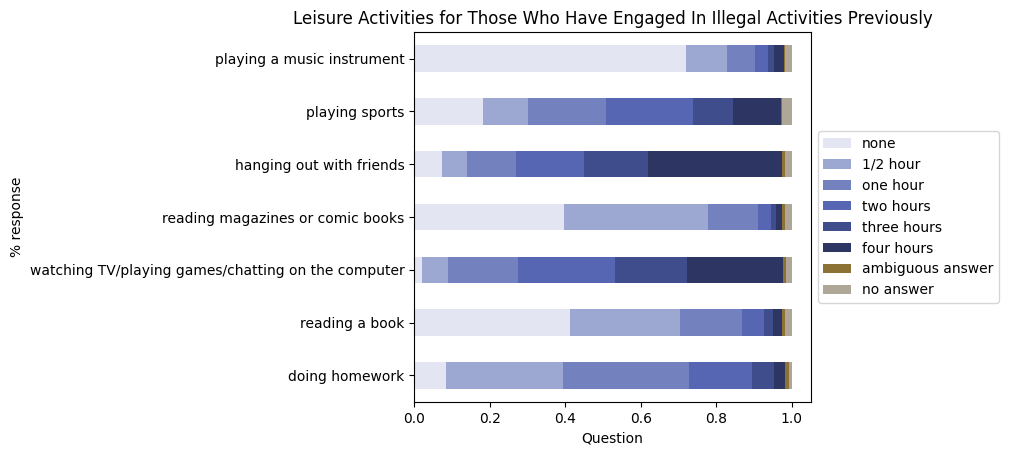

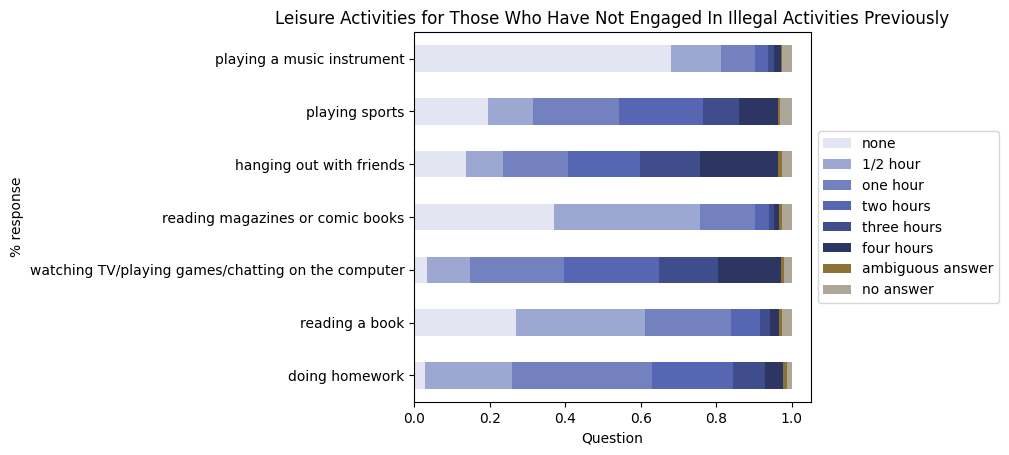

In [98]:
create_plot(df_crime2,"Leisure Activities for Those Who Have Engaged In Illegal Activities Previously")
create_plot(df_ncrime2,"Leisure Activities for Those Who Have Not Engaged In Illegal Activities Previously")

# Plot in One Visualization
https://stackoverflow.com/a/47040206

In [99]:
# reformat df to fit altair
df_crime2['committed_crime']=1
df_ncrime2['committed_crime']=0

df_crime2.reset_index(inplace=True)
df_ncrime2.reset_index(inplace=True)

In [100]:
df_crime2.describe()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,committed_crime
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,0.270559,0.191920,0.175011,0.137053,0.082319,0.118763,0.006920,0.017457,1.0
std,0.251796,0.130867,0.082385,0.093183,0.074393,0.135480,0.002923,0.005027,0.0
min,0.021963,0.066411,0.074650,0.034517,0.013334,0.013963,0.001518,0.008456,1.0
25%,0.079658,0.088244,0.131065,0.047786,0.019687,0.024956,0.006071,0.016554,1.0
50%,0.183080,0.119444,0.163111,0.165192,0.058020,0.031005,0.008282,0.018213,1.0
75%,0.404904,0.299488,0.195124,0.203721,0.137429,0.191460,0.008673,0.018581,1.0
max,0.719743,0.382117,0.334938,0.256645,0.190647,0.353541,0.009150,0.025259,1.0


In [126]:
df_altair = pd.concat([df_crime2, df_ncrime2])

answers={1: '1: none', 
         2: '2: 1/2 hour', 
         3: '3: one hour',
         4: '4: two hours',
         5: '5: three hours',
         6: '6: four hours',
         7: '7: ambiguous answer',
         9: '8: no answer'}
df_altair.rename(columns=answers,inplace =True)
df_altair.head()

,index,1: none,2: 1/2 hour,3: one hour,4: two hours,5: three hours,6: four hours,7: ambiguous answer,8: no answer,committed_crime
0,doing homework,0.084775,0.308790,0.334938,0.165192,0.058020,0.031005,0.008824,0.008456,1
1,reading a book,0.413620,0.290187,0.163111,0.060470,0.022289,0.023676,0.008521,0.018126,1
2,watching TV/playing games/chatting on the comp...,0.021963,0.068687,0.183752,0.256645,0.190647,0.255301,0.008022,0.014982,1
3,reading magazines or comic books,0.396188,0.382117,0.132301,0.035103,0.013334,0.013963,0.008282,0.018711,1
4,hanging out with friends,0.074541,0.066411,0.129830,0.177811,0.170504,0.353541,0.009150,0.018213,1


In [127]:
# create hierarchy for altair

df_altair2= pd.melt(df_altair, id_vars=['index','committed_crime']
        , var_name='answer'
        , value_name='percentage')

df_altair2.to_csv("df_altair2.csv", index=False)
df_altair2.head()

,index,committed_crime,answer,percentage
0,doing homework,1,1: none,0.084775
1,reading a book,1,1: none,0.413620
2,watching TV/playing games/chatting on the comp...,1,1: none,0.021963
3,reading magazines or comic books,1,1: none,0.396188
4,hanging out with friends,1,1: none,0.074541


In [143]:
import altair as alt

# custom color mapping
alt_colors = ['#E3E6F2',
         '#9DA8D2',
         '#7382BF',
         '#5766B2',
         '#404D8C',
         '#2D3662',
         '#8D7235',
         '#AEA798']

alt.Chart(df_altair2).mark_bar().encode(
    x=alt.X('committed_crime:N', title=None),
    y=alt.Y('percentage:Q',axis=alt.Axis(grid=False,title="Percentage")),
    column=alt.Column('index:N', title="Activity"
        , header=alt.Header(labelAngle=-90
            ,labelBaseline='top'
            ,labelAnchor='end')),
    color=alt.Color('answer:N',
        scale=alt.Scale(range=alt_colors,),
    )\
    ).configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    )

alt.Chart(...)